In [40]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F        # activation function
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from IPython import display

In [41]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # x data (tensor), shape = (100,1) 
y = x.pow(2)+ 0.2*torch.rand(x.size())       # noisy y data(tensor), shape = (100,1)

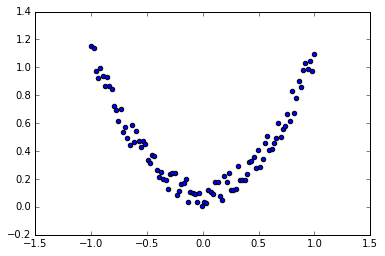

In [42]:
x, y = Variable(x), Variable(y)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [43]:
# Define neutral network
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)    # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)     # output layer
    
    def forward(self, x):
        x = F.relu(self.hidden(x))         # activation函数
        x = self.predict(x)                # output
        return x

In [44]:
net = Net(n_features = 1, n_hidden = 10, n_output = 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [45]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()     #均方差

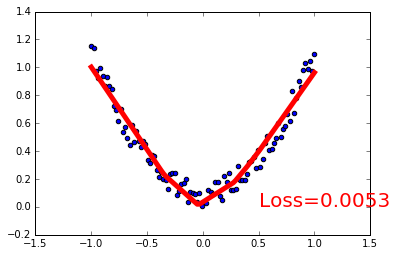

In [46]:

for t in range(200):
    prediction = net(x)         # x training data
    loss = loss_func(prediction, y)
    optimizer.zero_grad()       # clear parameter
    loss.backward()             # loss function
    optimizer.step()            # update parameter
    
    if t%5 == 0:
        # plt and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size':20, 'color':'red'})
        display.display(plt.gcf())
        display.clear_output(wait=True)